In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

#utility
from helper import utility

In [2]:
#load data 
prop_2016 = utility.load_data('data/properties_2016.csv')
prop_2017 = utility.load_data('data/properties_2017.csv')
#train_2016 = utility.load_data('data/train_2016_v2.csv')
#train_2017 = utility.load_data('data/train_2017.csv')
train_2016=pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])
train_2017=pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])

c:\Users\adeli\CE4041_ML\helper\utility.py:7: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)
c:\Users\adeli\CE4041_ML\helper\utility.py:7: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [3]:
#see data
print(prop_2016.shape)
prop_2016.head()


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
#see data
print(train_2016.shape)
train_2016.head()

(90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
#join training data with properties data 
merged_train_2016=pd.merge(train_2016,prop_2016, on='parcelid', how='left')
merged_train_2017=pd.merge(train_2017,prop_2017, on='parcelid', how='left')
merged_train_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [6]:
#looking at the data types of each variables
merged_train_2016.dtypes

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

In [7]:
#see percentage of missing features in data
utility.print_percent_missing(merged_train_2016)

parcelid : 0.0%

logerror : 0.0%

transactiondate : 0.0%

bathroomcnt : 0.0%

bedroomcnt : 0.0%

fips : 0.0%

latitude : 0.0%

longitude : 0.0%

propertylandusetypeid : 0.0%

rawcensustractandblock : 0.0%

regionidcounty : 0.0%

roomcnt : 0.0%

assessmentyear : 0.0%

propertycountylandusecode : 0.0011077263915812794%

taxvaluedollarcnt : 0.0011077263915812794%

landtaxvaluedollarcnt : 0.0011077263915812794%

taxamount : 0.006646358349487676%

regionidzip : 0.03877042370534478%

structuretaxvaluedollarcnt : 0.4209360288008862%

censustractandblock : 0.670174466906674%

calculatedfinishedsquarefeet : 0.7322071448352256%

yearbuilt : 0.8374411520354473%

calculatedbathnbr : 1.3093325948490724%

fullbathcnt : 1.3093325948490724%

regionidcity : 1.997230684021047%

finishedsquarefeet12 : 5.183051786208806%

lotsizesquarefeet : 11.243422874549987%

unitcnt : 35.360841872057605%

propertyzoningdesc : 35.405150927720854%

buildingqualitytypeid : 36.45638327333149%

heatingorsystemtypeid : 37.8

In [8]:
#correlation coefficient 

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


<Axes: >

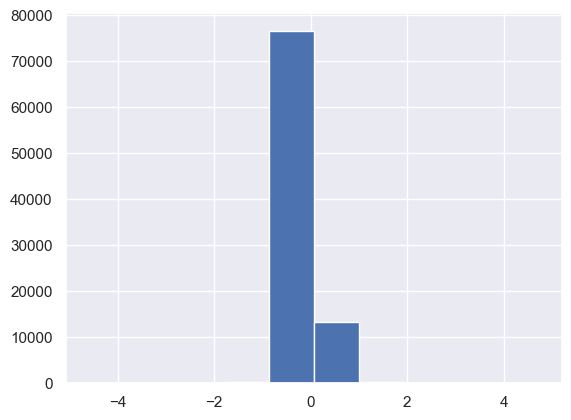

In [9]:
#looking at distribution of log error 
print(train_2016['logerror'].describe())
train_2016['logerror'].hist()

C:\Users\adeli\AppData\Local\Temp\ipykernel_4156\988119408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2016['logerror'].loc[train_2016['logerror'] > ulimit] = ulimit
C:\Users\adeli\AppData\Local\Temp\ipykernel_4156\988119408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2016['logerror'].loc[train_2016['logerror'] < llimit] = llimit


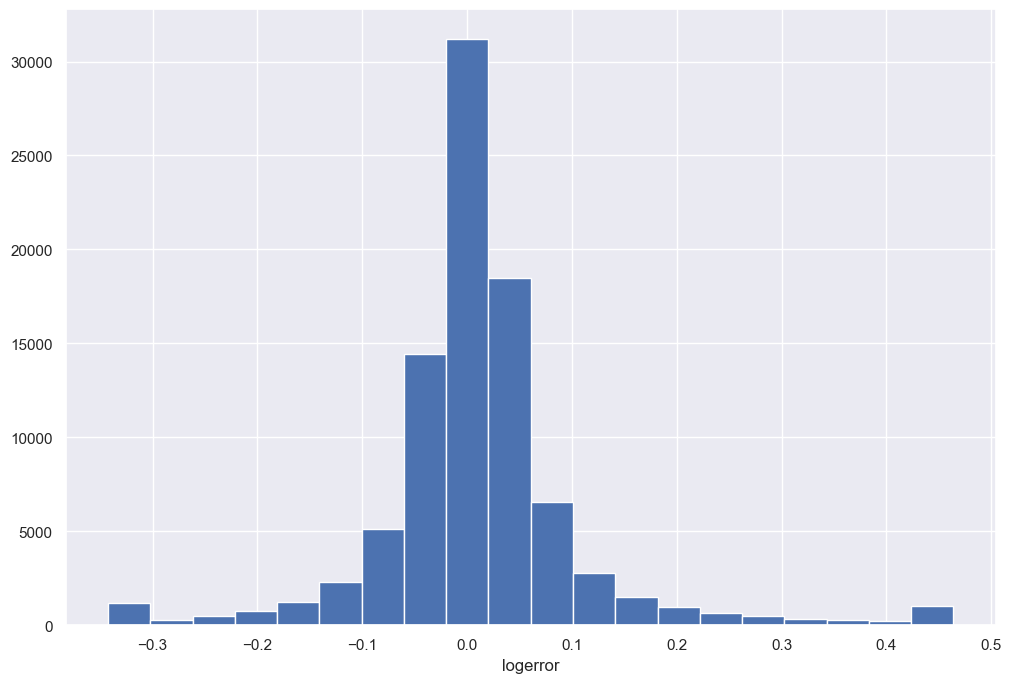

In [10]:
#removing outliers in logerror for better distribution
ulimit = np.percentile(train_2016['logerror'].values, 99)
llimit = np.percentile(train_2016['logerror'].values, 1)

train_2016['logerror'].loc[train_2016['logerror'] > ulimit] = ulimit
train_2016['logerror'].loc[train_2016['logerror'] < llimit] = llimit

plt.figure(figsize = (12, 8))
train_2016['logerror'].hist(bins=20)
plt.xlabel('logerror', fontsize = 12)
plt.show()

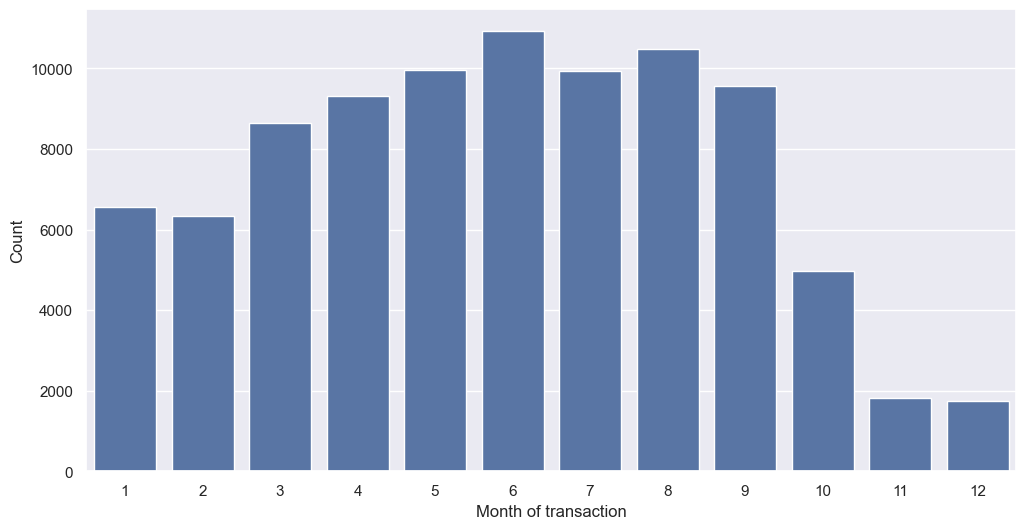

In [11]:
#observing datetime transaction 

train_2016['transaction_month'] = train_2016['transactiondate'].dt.month

count = train_2016['transaction_month'].value_counts()
plt.figure(figsize = (12,6))
sb.barplot(x=count.index, y=count.values)
plt.xlabel('Month of transaction', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

<Figure size 1200x1200 with 0 Axes>

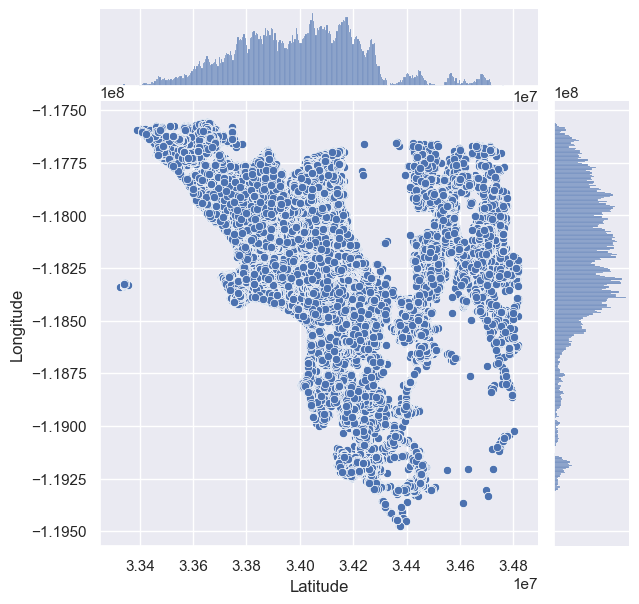

In [12]:
#longitude and latitude distribution 
plt.figure(figsize=(12,12))
sb.jointplot(x=prop_2016['latitude'].values, y=prop_2016['longitude'].values)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
#logerror with respect to latitude and longitude 
from plotnine import ggplot, aes, labs, geom_point
from plotnine.scales import scale_color_gradient
from ggplot import *
ggplot(train_2016) +\
    aes(x='latitude', y='longitude', color = 'logerror') + \
    geom_point()  + \
    scale_color_gradient(low = 'red', high = 'blue')

AttributeError: module 'pandas' has no attribute 'tslib'